# Análisis de componentes principales

En este cuaderno, veremos algunos ejemplos y ejercicios sobre el método de componentes principales. 

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import pandas as pd

Comenzaremos cargando una base de datos incluida en el paquete Sklearn. 

In [3]:
data = load_breast_cancer()
X = data.data  # Características

Podemos imprimir la descripción de esta base de datos y transformar los datos en una tabla de Pandas para visualizarlos de manera ordenada.

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
df = pd.DataFrame(data= data.data, columns= data['feature_names'] )
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Adicionalmente, graficaremos las relaciones entre las distintas variables de la tabla. En este ejercicio, solo tomaremos los primeros 5 elementos, donde se pueden apreciar algunas variables altamente correlacionadas.

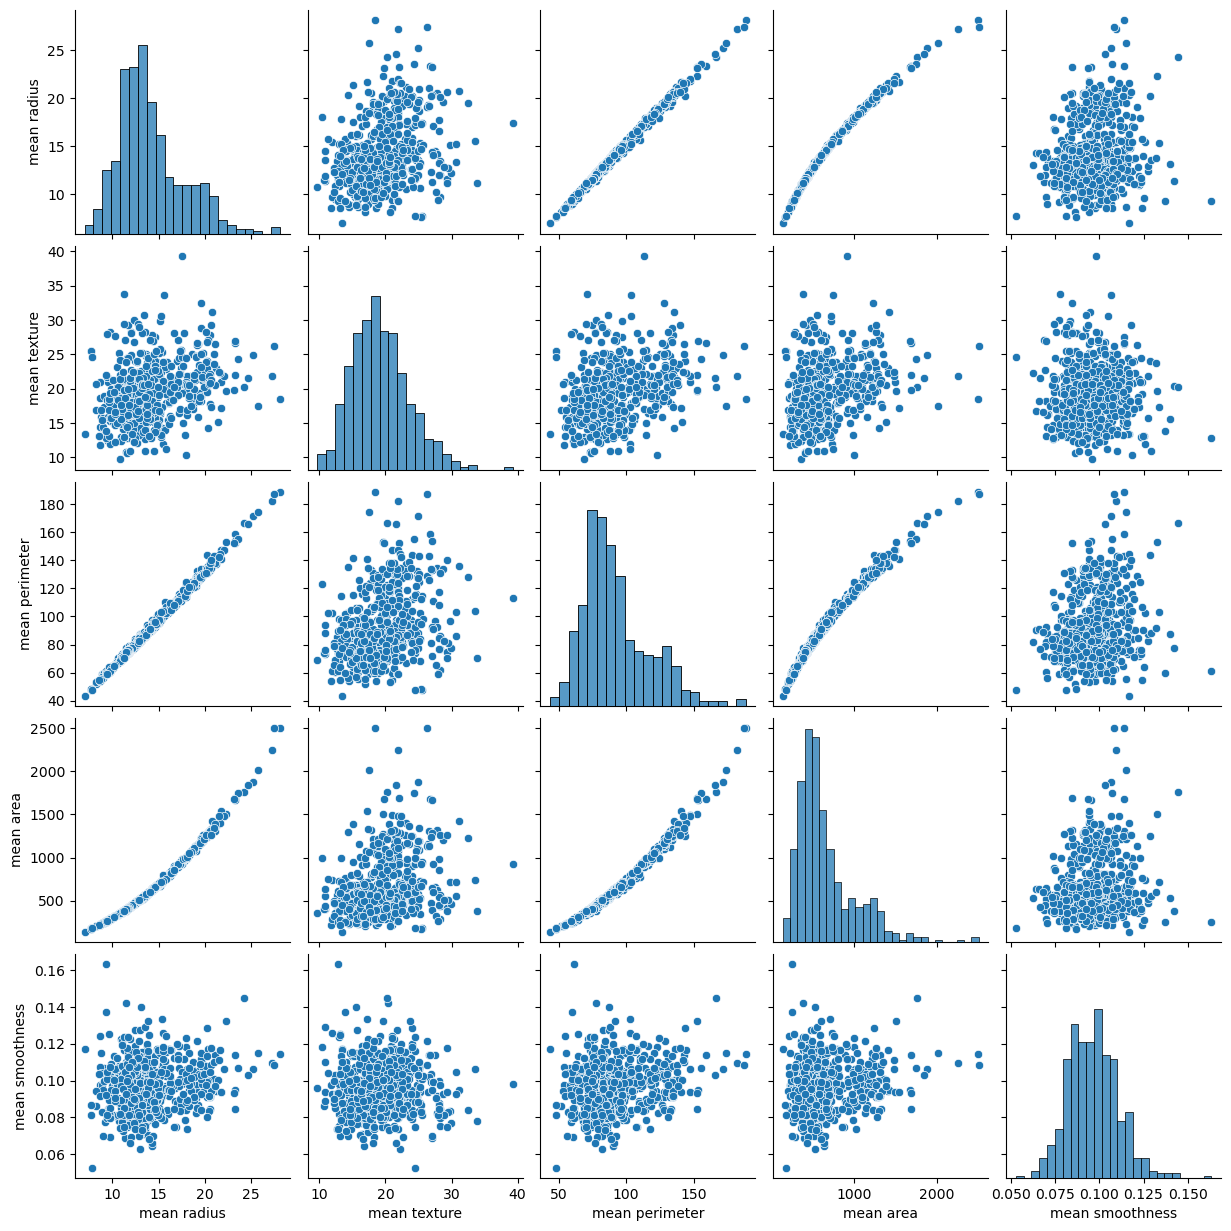

In [6]:
sns.pairplot(df[data['feature_names'][:5]])

Crearemos un modelo de análisis de componentes principales y lo ajustaremos a los datos que tenemos. Posteriormente, imprimiremos los datos transformados por componentes principales y la varianza explicada por cada una de las variables.

In [7]:
pca = PCA() 
X_pca = pca.fit_transform(X)

In [8]:
print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

Varianza explicada por cada componente principal:
[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473205e-08 1.65908880e-08
 6.99641650e-09 4.78318306e-09 2.93549214e-09 1.41684927e-09
 8.29577731e-10 5.20405883e-10 4.08463983e-10 3.63313378e-10
 1.72849737e-10 1.27487508e-10 7.72682973e-11 6.28357718e-11
 3.57302295e-11 2.76396041e-11 8.14452259e-12 6.30211541e-12
 4.43666945e-12 1.55344680e-12]


Al observar el análisis de componentes principales, notamos que tiene la misma cantidad de variables que el modelo original, ya que no se ha impuesto ninguna restricción.

In [9]:
pca_df = pd.DataFrame(data= X_pca)
pca_df


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,0.931337,0.148167,0.745463,0.589359,...,0.021189,0.000241,0.002528,0.011560,0.005773,0.001377,-0.001982,0.001293,0.001989,0.000704
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,-0.046037,0.200804,-0.485828,-0.084035,...,0.005237,0.021069,0.001565,0.006968,-0.006978,0.001411,-0.000083,-0.001347,0.000686,-0.001061
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,-0.779745,-0.274026,-0.173874,-0.186994,...,-0.009865,-0.002394,-0.004125,-0.004007,0.000709,-0.003781,0.000178,0.000018,-0.000775,0.000405
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,-1.267304,-0.060555,-0.330639,-0.144155,...,0.011169,0.007063,0.001537,0.007003,-0.010261,-0.002899,0.000016,0.001369,-0.002139,-0.001657
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,-0.335522,0.289109,0.036087,-0.138502,...,-0.009916,0.010269,0.002204,0.002764,0.002455,0.001665,0.003290,0.000273,0.001783,0.000327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1414.126684,110.222492,40.065944,6.562240,-5.102856,-0.395424,-0.786751,0.037082,-0.452530,-0.235185,...,-0.017214,0.007864,-0.002317,-0.002384,-0.003637,-0.008211,0.002418,0.001234,-0.000078,-0.000455
565,1045.018854,77.057589,0.036669,-4.753245,-12.417863,-0.059637,0.449831,0.509154,-0.449986,0.493247,...,0.011219,-0.001905,-0.003028,-0.007931,0.002905,-0.002519,0.000212,0.001006,-0.000621,-0.000741
566,314.501756,47.553525,-10.442407,-9.771881,-6.156213,-0.870726,-2.166493,-0.442279,-0.097398,-0.144667,...,-0.003362,-0.002249,-0.001248,-0.003927,-0.000921,0.000573,-0.001325,0.000025,0.000484,-0.000285
567,1124.858115,34.129225,-19.742087,-23.660881,3.565133,4.086390,-1.705401,-0.359964,0.385030,0.615467,...,-0.006130,-0.010804,0.005841,0.001127,-0.002646,0.001862,0.002698,0.001235,-0.000809,0.001217


También podemos graficar los nuevos datos obtenidos y ver que se han perdido las correlaciones.

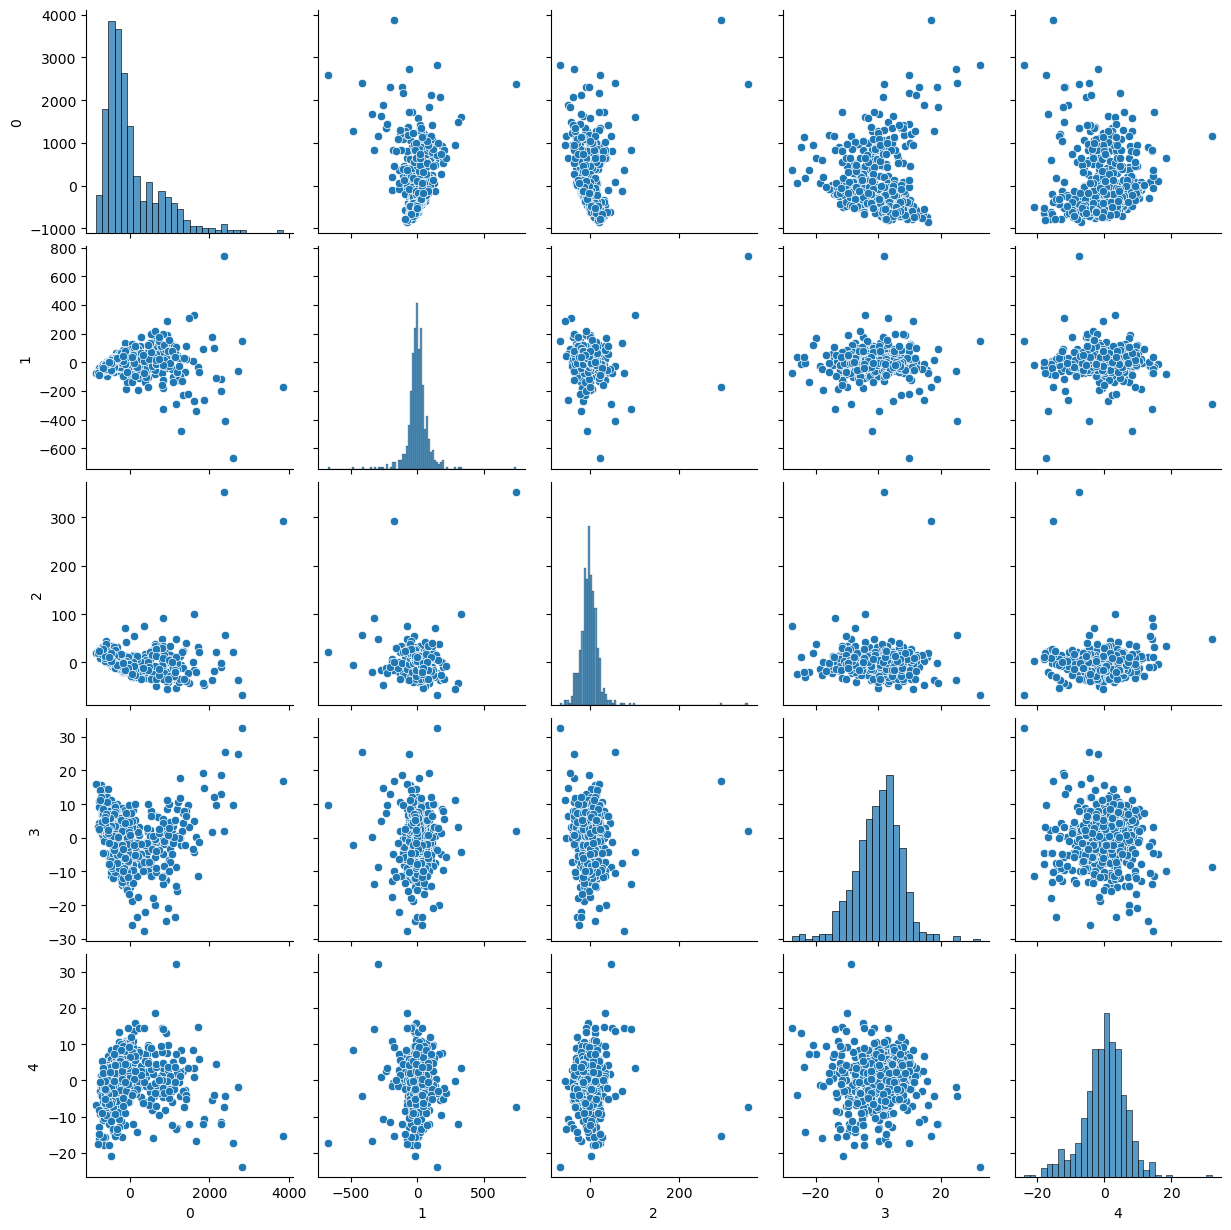

In [10]:
sns.pairplot(pca_df[pca_df.columns[:5]])

Si analizamos el nivel de varianza explicada por cada una de las variables de componentes principales, vemos que las dos primeras variables explican el 99.8% de la variabilidad.

In [12]:
np.cumsum(pca.explained_variance_ratio_)

# Con dos ya tenemos 99.82 de cobertura

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788,
       0.99999453, 0.99999854, 0.99999936, 0.99999971, 0.99999989,
       0.99999996, 0.99999998, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

Por lo tanto, generamos un nuevo modelo de componentes principales restringido únicamente a dos variables. Observamos la tabla resultante, la cual coincide con la anterior pero solo contiene las dos primeras columnas restringidas.

In [13]:
pca_2 = PCA(n_components=2) 
X_pca_2 = pca_2.fit_transform(X)

In [14]:
print("Varianza explicada por cada componente principal:")
print(pca_2.explained_variance_ratio_)

Varianza explicada por cada componente principal:
[0.98204467 0.01617649]


In [15]:
pca_2_df = pd.DataFrame(data= X_pca_2)
pca_2_df

,0,1
0,1160.142574,-293.917544
1,1269.122443,15.630182
2,995.793889,39.156743
3,-407.180803,-67.380320
4,930.341180,189.340742
...,...,...
564,1414.126684,110.222492
565,1045.018854,77.057589
566,314.501756,47.553525
567,1124.858115,34.129225


También podemos visualizar cómo interactúan estas dos variables creadas.

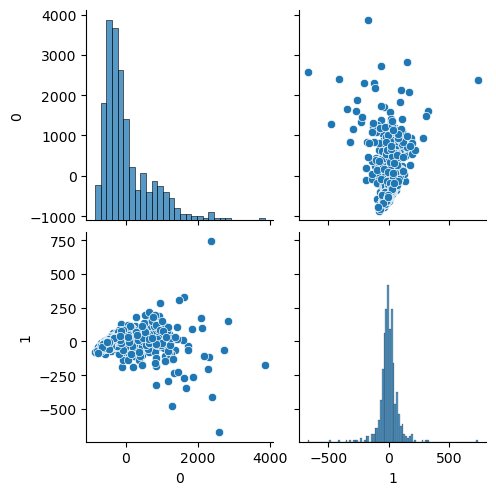

In [16]:
sns.pairplot(pca_2_df)